# <span style="color:green"><center>Diplomado en Ciencia de Datos</center></span>

# <span style="color:red"><center>Análisis en componentes principales</center></span>

# **<font size=5 color=#0000FF>Profesores**

1. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
2. Alvaro Mauricio Montenegro Díaz,ammontenegrod@unal.edu.co 
3. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com
4. Oleg Jarma, ojarmam@unal.edu.co






# **<font size=5 color=#0000FF>Asesora Medios y Marketing Digital**

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

## <span style="color:blue">Asistentes</span>

1. Jessica López Mejia, jelopezme@unal.edu.co

## **Contenido**

* [Introducción](#)
* [Nube de individuos](#)
* [Nube de variables](#)
* [Dualidad entre representaciones](#)
* [ACP generalizado](#)

Fuente: 

# **Introducción**

El análisis en componentes principales (ACP) es muy conocido en la Ciencia de Datos como una técnica de reducción de dimensión, pero es mucho más que eso. Si se aborda desde un punto de vista geométrico, es una técnica poderosa para la visualización de datos.  Hacemos uso del R en primera instancia para entender los métodos y luego para llevarlos a cabo en la práctica. En este cuaderno introducimos el ACP como se conoce en la mayoría de los ámbitos y que podemos llamar ACP canónico. 

Primero veremos, con ejemplos "de juguete", la analogía de la media y la varianza con el centro de gravedad y el momento de inercia, cuando se tiene un sistema de cuerpos en equilibrio, luego el ACP con dos variables, como una rotación de los ejes, enseguida el ACP con tres variables. Finalmente el ACP con $p$ variables.

Para ver con mayor detalle se puede consultar el libro *Estadística descriptiva multivariada*, disponible en [PDF](https://bit.ly/3mD9rEY) en la página Web de la Facultad de Ciencias, Universidad Nacional de Colombia Sede Bogotá. 

## <span style="color:blue"><center>Geometría de una variable</center></span>

Se tiene la variable $Y$, con los valores:

In [1]:
Y <- c(9,7,8,3,1,3,4,7,2,6)
cat("Y = [",Y,"]")

Y = [ 9 7 8 3 1 3 4 7 2 6 ]

La media de $Y$ es el centro de gravedad de los 10 puntos, si se consideran, por ejemplo como esferas sobre una barra de peso despreciable:
$$
g = \sum_{i=1}^{10} p_i y_i \  \ \ con \ \ \sum_{i=1}^{10} p_i =1
$$
El caso particular de $p_i = \dfrac{1}{n}$ para todo $i$, el que calcula R con la función
*mean{base}*
$$
\bar{Y} = \frac{1}{n} \sum_{i=1}^{10} p_i y_i
$$
Llamaremos $g$ a la media de $Y$:

In [2]:
g=mean(Y) 
cat("media de Y = g = ",g)

media de Y = g =  5

Sea $X = Y-g$:

In [3]:
X = Y-g
cat("X = [",X,"]")

X = [ 4 2 3 -2 -4 -2 -1 2 -3 1 ]

Representación de $Y$ y $X$ en la recta real:

<figure> 
<img src="../imagenes/geometriaY.png"  width="480" height="480" align="left"/> 
</figure>

Nótese que al restar la media ($Y-g$) el cero se ha trasladado a la media (cinco). Las tranlaciones no modifican la varianza entonces $Y$ y $X$ tienen igual varianza, pero como $X$ está centrada en el cáculo de la varianza se suman los cuadrados de $X$, la varianza es entonces el momento de de inercia de los puntos con respecto al centro de gravedad.

Sea $V$, la varianza de $Y$ (igual a la de $X$), entonces $V =\dfrac{1}{10} \sum_\limits{i=1}^{10} x_i^2$

Por otro lado, el momento de inercia es:
$$
V = \sum_{i=1}^{10} p_i d^2(y_i,g) = \sum_{i=1}^{10} p_i d^2(x_i,0) = \frac{1}{10} \sum_{i=1}^{10}  x_i^2
$$
En Estadística le decimos *Inercia* al momento de inercia respecto al centro de gravedad, de la física. Cuando nos referimos a una sola variable le decimos *varianza*.

In [4]:
V=1/10*sum(X*X)
cat("Varianza de X = ",V)

Varianza de X =  6.8

La función *var{stats}* de R calcula la varianza muestral (divide por $n-1$ = 9) entonces se debe multiplivar por $\dfrac{n-1}{n}$, en este ejemplo por $9/10)$

In [5]:
9/10*var(Y)

[1] 6.8

## <span style="color:blue"><center>Geometría de dos variables</center></span>

Sea la variable $Y_1 = Y$ y $Y_2$ con los valores:


In [6]:
Y1=Y
Y2=c(9,13,6,1,5,11,4,3,8,10)
cat("Y2 = [",Y2,"]")

Y2 = [ 9 13 6 1 5 11 4 3 8 10 ]

Ahora llamamos **Y** la tabla de datos (matriz) de $10$ filas y $2$ columnas, por comodidad se muestra transpuesta:

In [7]:
Y = cbind(Y1,Y2)
rownames(Y)=1:10
t(Y)

,1,2,3,4,5,6,7,8,9,10
Y1,9,7,8,3,1,3,4,7,2,6
Y2,9,13,6,1,5,11,4,3,8,10


Cada columna de $\mathbf{Y}^T$ es un vector en $\Re^2$, que notaremos por $\mathbf{y}_i \ \ i =1,2,\cdots,10$ y el centro de gravedad es el vector formado por las dos medias:
$$
\mathbf{g} = \frac{1}{n}\sum_{i=1}^{10}  \mathbf{y}_i
$$

In [8]:
g=colMeans(Y)
cat("Centro de gravedad = g = ",g)

Centro de gravedad = g =  5 7

Representación de los puntos en el plano, junto con su centro de gravedad:

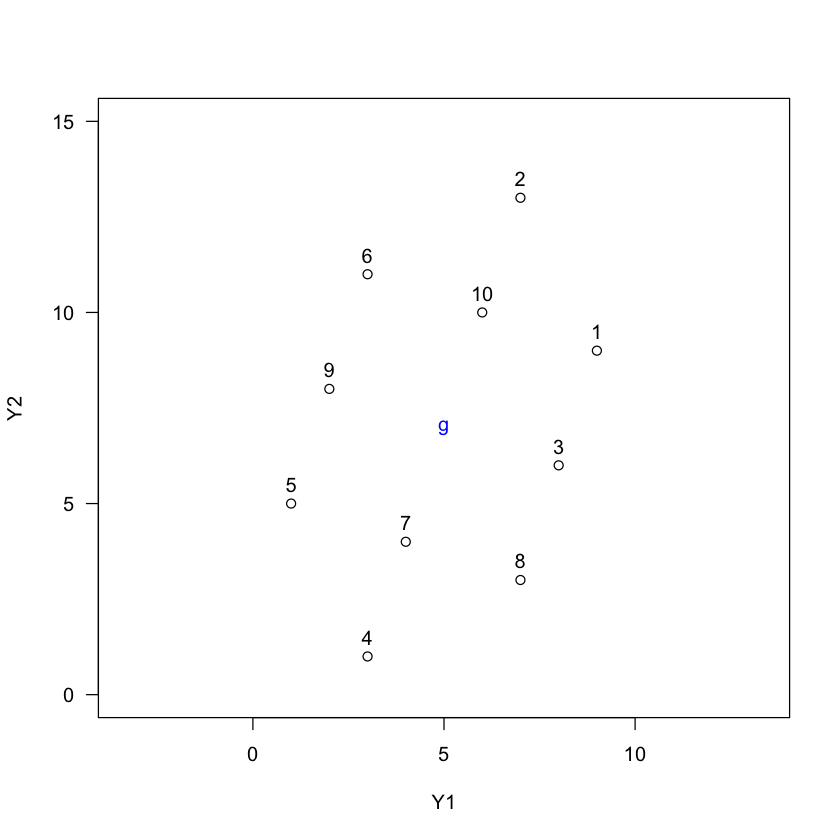

In [9]:
plot(Y,las=1,xlim=c(0,10),ylim=c(0,15),asp=1)
text(Y,labels=rownames(Y),pos=3)
text(g[1],g[2],col="blue",labels="g")


Ahora centramos los puntos (poner el cero en el centro de gravedad):
$$
\mathbf{x}_i = \mathbf{y}_i - \mathbf{g}
$$

Diagrama de dispersión transladando el origen al centro de gravedad (centrado)

In [10]:
X = matrix(NA,10,2)
for (i in 1:10) X[i,] = Y[i,] - g
colnames(X) = paste("X",1:2,sep="")
rownames(X) = 1:10
X
# suma 0 porque están centrados
cat("Suma = ",colSums(X))


,X1,X2
1,4,2
2,2,6
3,3,-1
4,-2,-6
5,-4,-2
6,-2,4
7,-1,-3
8,2,-4
9,-3,1
10,1,3


Suma =  0 0

Plano de los puntos centrados:

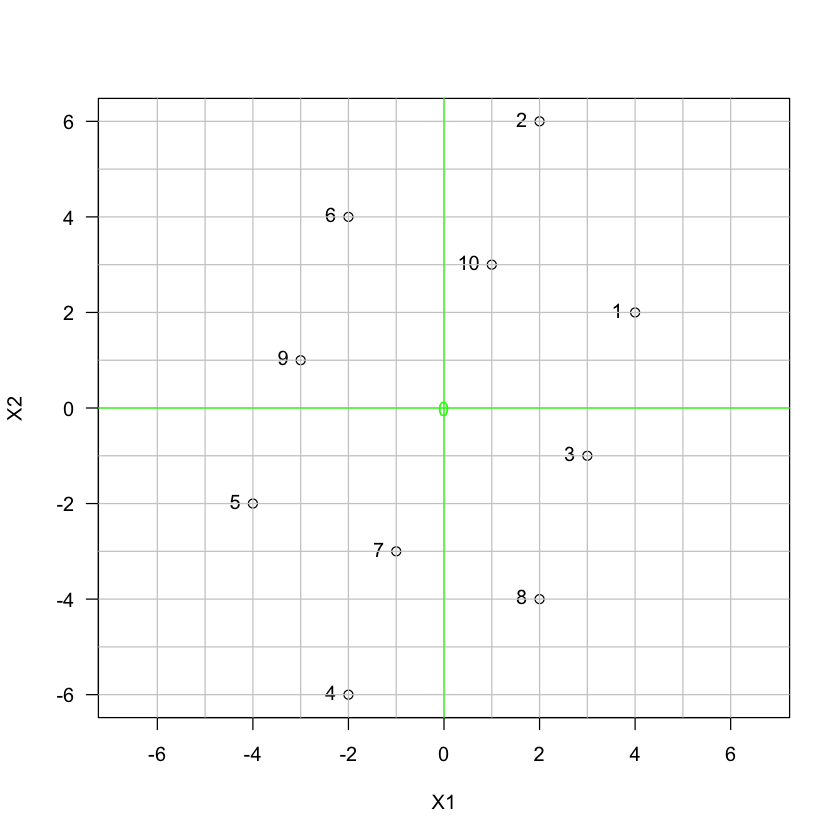

In [11]:
plot(X,las=1,asp=1)
text(X,labels=rownames(X),pos=2)
abline(v=-6:6,h=-6:6,col="gray80")
abline(v=0,h=0,col="green")
text(0,0,"0",col="green")


Ahora busquemos el eje en la dirección más alargada de la nube de puntos. A ojo se ve que es la linea que pasa por el origen y es de pendiente 3 y dibujemos también la que pasa por el origen y es de pendiente -3:

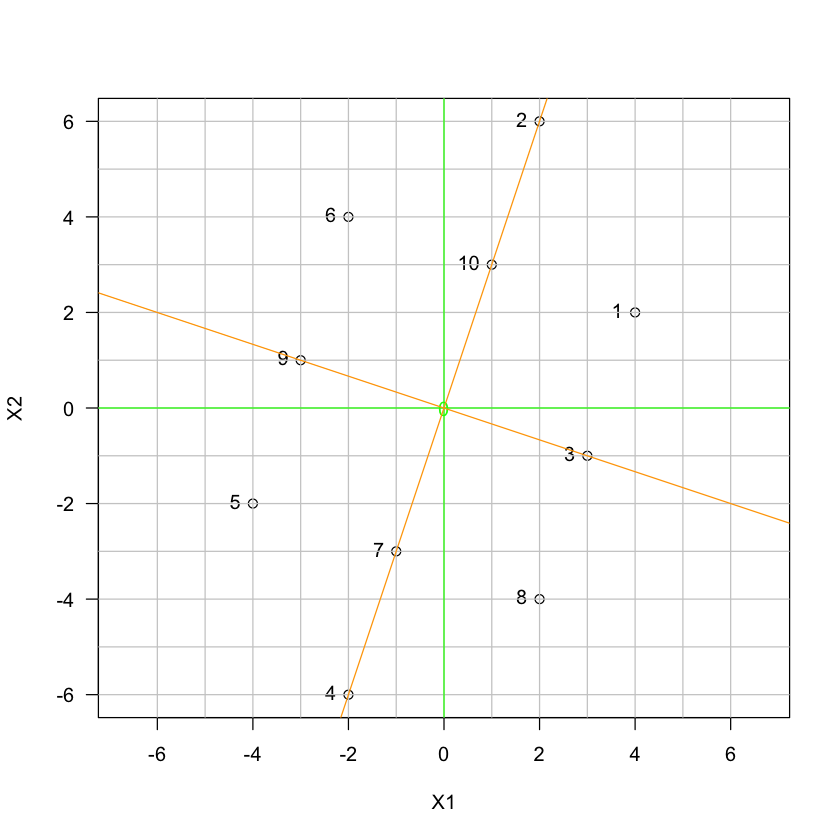

In [12]:
plot(X,las=1,asp=1)
text(X,labels=rownames(X),pos=2)
abline(v=-6:6,h=-6:6,col="gray80")
abline(v=0,h=0,col="green")
text(0,0,"0",col="green")
# en la dirección más alargada
abline(0,3,col="orange")
# eje perpendicular
abline(0,-1/3,col="orange")

Tomemos como vector director el punto 10 de coordenadas $[1 \ 3]^T$, calculemos su norma y obtengamos $\mathbf{u}_1$, de norma 1::

In [13]:
t = c(1,3)
nor.t=sqrt(sum(t*t))
cat("\nNorma de t = ",round(nor.t,2))
u1 = t/nor.t
cat("\nu1 = ",round(u1,2))
u2 = c(-u1[2],u1[1])
cat("\nu2 = ",round(u2,2))       


Norma de t =  3.16
u1 =  0.32 0.95
u2 =  -0.95 0.32

La recta generado por $u_1$, la llamamos $F_1$ y  la generada por $F_2$
Ahora tenemos que encontrar las proyecciones de los 10 puntos sobre los ejes $F_1$ y $F_2$. Si hacemos la gráfica en papel cuadriculado podemos medir las proyecciones con una regla. Sin embargo podemos hacerlo con observación geométrica:

- El punto 10 está sobre $F_1$ y tiene norma 3.16 (redondeada a dos decimales) $\rightarrow$ ls coordena de 10 sobre $F_1$ es 3.16. 
- Los puntos 1 y 6 tienen la misma coordenada de 10. 
- El punto 7 es de la misma longitud de 10, pero tiene sentido opuesto, entonces su coordenada es -3.16, igual que la de los puntos 5 y 8, 
- los puntos 3 y 6 se proyectan en 0, los puntos 2 y 4 tienen 2 veces la longitud de 10 y 7; 

Entonces las proyecciones sobre $F_1$ son:


In [14]:
F1 =c(3.16,6.32,0,-6.32,-3.16,3.16,-3.16,-3.16,0,3.16)
sum(F1)
F2 = c(-3.16,0,-3.16,0,3.16,3.16,0,-3.16,3.16,0)
sum(F2)

[1] 0

[1] 0

Llamemos $\mathbf{F}$ la tabla de coordenadas sobre los nuevos ejes y hagamos el plano pero con $F_1$ como eje horizontal y $F_2$ como vertical:


,1,2,3,4,5,6,7,8,9,10
F1,3.16,6.32,0.00,-6.32,-3.16,3.16,-3.16,-3.16,0.00,3.16
F2,-3.16,0.00,-3.16,0.00,3.16,3.16,0.00,-3.16,3.16,0.00


,u1,u2
X1,0.32,-0.95
X2,0.95,0.32


Pendiente X1 =  -3

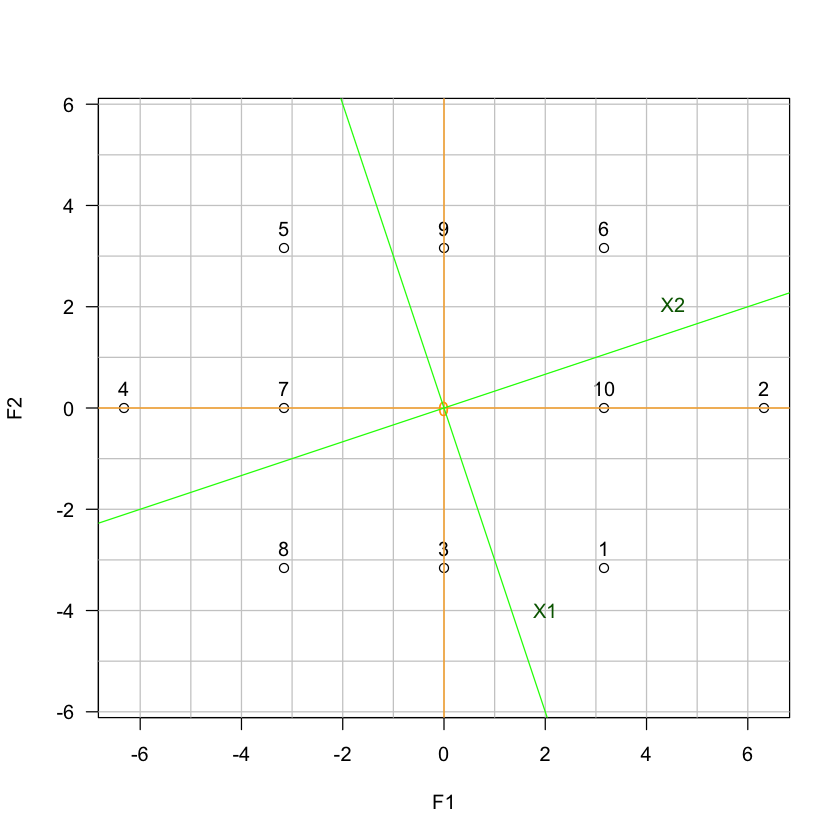

In [15]:
F =cbind(F1,F2)
colnames(F)=c("F1","F2")
rownames(F)=1:10
t(F)
plot(F,las=1,asp=1)
text(F,labels=rownames(F),pos=3)
abline(v=-6:6,h=-6:6,col="gray80")
abline(v=0,h=0,col="orange")
text(0,0,"0",col="orange")
# antiguos ejes sea U:
U=cbind(u1,u2)
rownames(U)=c("X1","X2")
round(U,2)
# la pendiente del antiguo eje X1 es
m1=U[1,2]/U[1,1]
cat("Pendiente X1 = ",m1)
abline(0,m1,col="green")
text(2,-4,"X1",col="darkgreen")
# X2
abline(0,-1/m1,col="green")
text(5,2,"X2",col="darkgreen",pos=2)

Pimero rotamos los ejes: nuevos $F_1$ y $F_2$ y luego la nube de puntos.

Suma de cuadrados y productos cruzados de **X** (**F**) y trazas:

In [16]:
SS.X = t(X)%*%X
SS.X
sum(diag(SS.X))
SS.F =t(F)%*%F
round(SS.F,1)
round(sum(diag(SS.F)),1)

,X1,X2
X1,68,24
X2,24,132


[1] 200

,F1,F2
F1,139.8,0.0
F2,0.0,59.9


[1] 199.7

Los nuevos ejes no están correlacionados.

## <span style="color:blue"><center>Geometría de tres variables</center></span>

Utilizaremos el ejemplo café: *cafe{FactoClass}*, que es una tabla de 12 cafés y 16 variables: propiedades físicas, químicas y sensoriales de tazas de café, para estudiar las calidades de los cafés contaminados con granos de maíz y cebada. El experimento fue realizado en el Laboratorio de Investigaciones Químicas del Café.

Con el ejemplo de juguete café: *cafe{FactoClass}*

In [17]:
library(FactoClass)

Loading required package: ade4

Loading required package: ggplot2

Loading required package: ggrepel

Loading required package: xtable

Loading required package: scatterplot3d



### Gráfica 3D

In [18]:
data(cafe)
Y<-cafe[1:10,1:3]
t(Y)

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C
Color,298.0,361.0,321.0,335.0,314.0,186.0,278.0,238,226.0,210.0
DA,385.1,481.3,422.6,444.3,368.7,346.6,422.6,403,368.7,368.7
EA,25.0,41.0,40.0,33.0,32.0,28.0,43.0,42,36.0,35.0


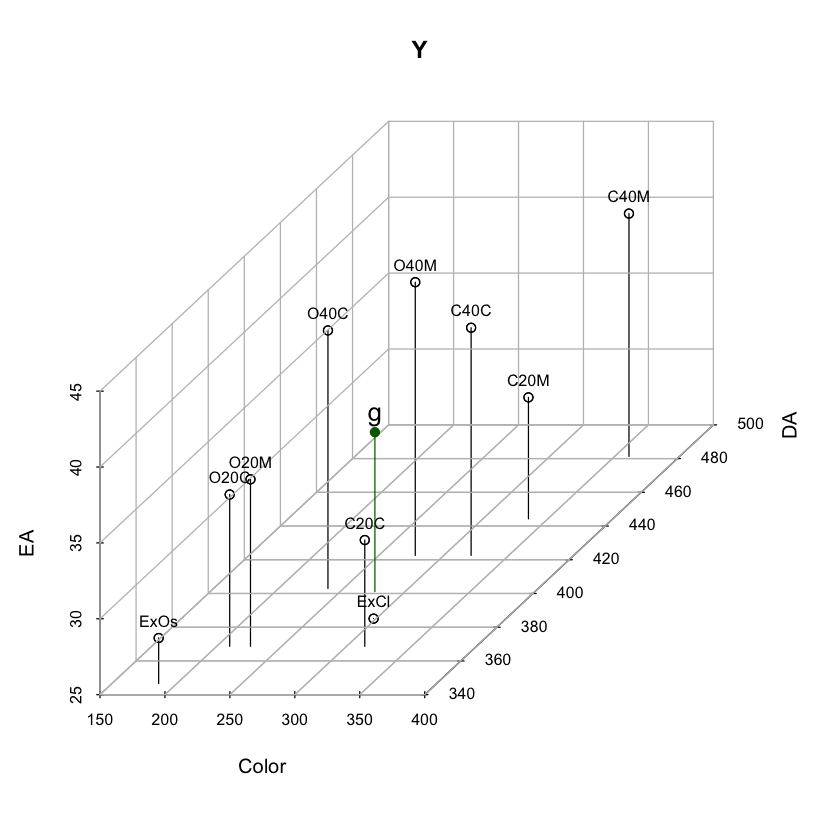

In [19]:
Y3D<-scatterplot3d(Y,main="Y",type="h",color="black",box=FALSE,
				   las=1); 
Y3D$points3d(Y,pch=1);
addgrids3d(Y, grid = c("xy","xz","yz"));
cord2d<-Y3D$xyz.convert(Y) # convertir cordenadas 3D a 2D;
# poner etiquetas;
text(cord2d,labels=rownames(Y), cex=0.8,col="black",pos=3); 
# poner el centro de gravedad en la gráfica
g <- colMeans(Y) 
Y3D$points3d(t(g),pch=19,col="darkgreen",type = "h");
text(Y3D$xyz.convert(t(g)),labels="g",pos=3,col="black",
     cex=1.3);


### Datos centrados

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C,g
Color,21.30,84.30,44.30,58.30,37.30,-90.70,1.30,-38.70,-50.70,-66.70,276.70
DA,-16.06,80.14,21.44,43.14,-32.46,-54.56,21.44,1.84,-32.46,-32.46,401.16
EA,-10.50,5.50,4.50,-2.50,-3.50,-7.50,7.50,6.50,0.50,-0.50,35.50


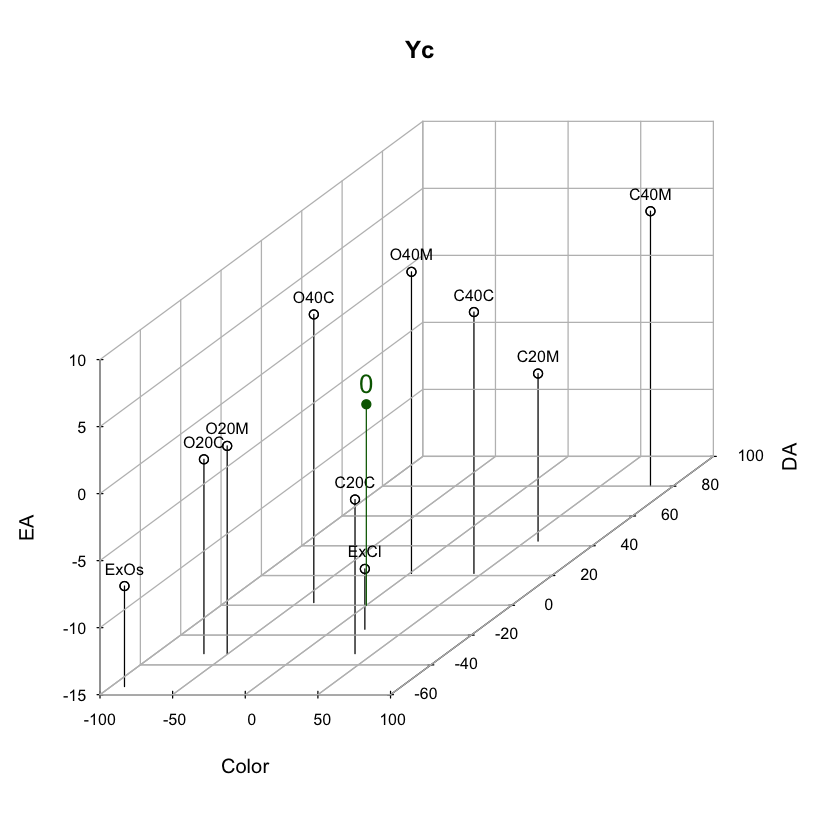

In [20]:
# cálculo de la matriz de datos centrados y representación en 3D
Yc<-scale(Y,scale=FALSE)   #calculo
attr(Yc,"scaled:center")->g  #la función scale muestra el centro de gravedad
t(rbind(Yc,g))
# grafica de datos centrados
par(las=1);
Yc3D<-scatterplot3d(Yc,main="Yc",type="h",color="black",
	               box=FALSE,las=1);
Yc3D$points3d(Yc,pch=1);
addgrids3d(Yc,grid=c("xy", "xz", "yz"));
text (Yc3D$xyz.convert(Yc),labels=rownames(Yc),cex=0.8,
	  col="black",pos=3);
Yc3D$points3d(t(c(0 ,0 ,0)),pch=19 , col ="darkgreen",type = "h");
text(Yc3D$xyz.convert (t(c(0 ,0 ,0))),labels ="0",pos =3, 
     col ="darkgreen",cex =1.3);


#### **Cálculo y gráfica 3D de la matriz de datos estandarizados X**

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C,g,Des
Color,0.36,1.44,0.75,0.99,0.63,-1.54,0.02,-0.66,-0.86,-1.14,276.70,58.7
DA,-0.39,1.92,0.51,1.04,-0.78,-1.31,0.51,0.04,-0.78,-0.78,401.16,41.6
EA,-1.72,0.90,0.74,-0.41,-0.57,-1.23,1.23,1.07,0.08,-0.08,35.50,6.1


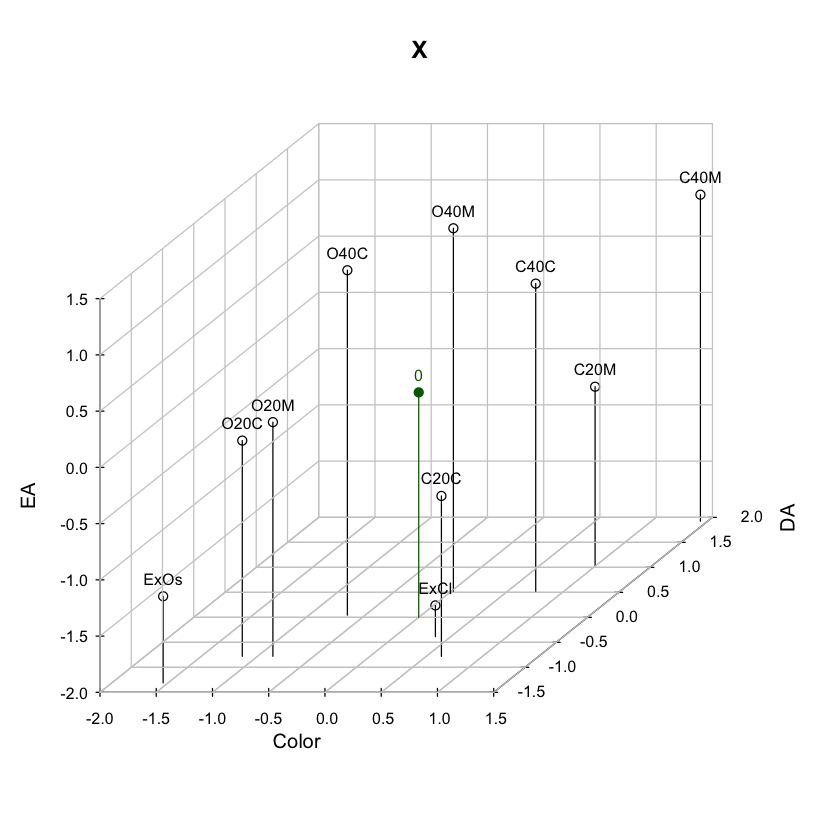

In [21]:
# Cálculo de matriz X estandarizada
X<-scale(Y)
# aquí la función scale calcula la media y la desviación estándar
# las varianzas que calcula R es la muestral: se divide por n-1
round(attr(X,"scaled:scale"),1)->Des
# X transpuesta + g + Des
t(round(rbind(X,g,Des),2))
# gráfica de la matriz centrada y reducida (estandrizada)
par(las=1) # etiquetas de los dos ejes sean horizontales;
X3D<-scatterplot3d(X,main="X",type ="h",box=FALSE,asp=1); 
X3D$points3d(Yc,pch=1);
addgrids3d(X,grid=c("xy","xz","yz"),col.grid="grey80");
text (X3D$xyz.convert(X),labels=rownames(X),cex=0.8,pos=3);
X3D$points3d (t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(X3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,col="darkgreen"
	 ,cex=0.8);


#### Rotación de ejes o cambio de base

In [22]:
acp=dudi.pca(Y,scannf=FALSE,nf=3)
cat("Tabla en nuevos ejes")
F=acp$li;round(t(F),2)

Tabla en nuevos ejes

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C
Axis1,-0.89,2.68,1.18,1.14,-0.44,-2.47,0.98,0.15,-1.04,-1.29
Axis2,-1.68,-0.22,0.15,-1.02,-0.82,-0.04,1.01,1.31,0.65,0.67
Axis3,-0.11,-0.29,0.33,-0.35,0.79,-0.38,0.06,-0.05,0.11,-0.12


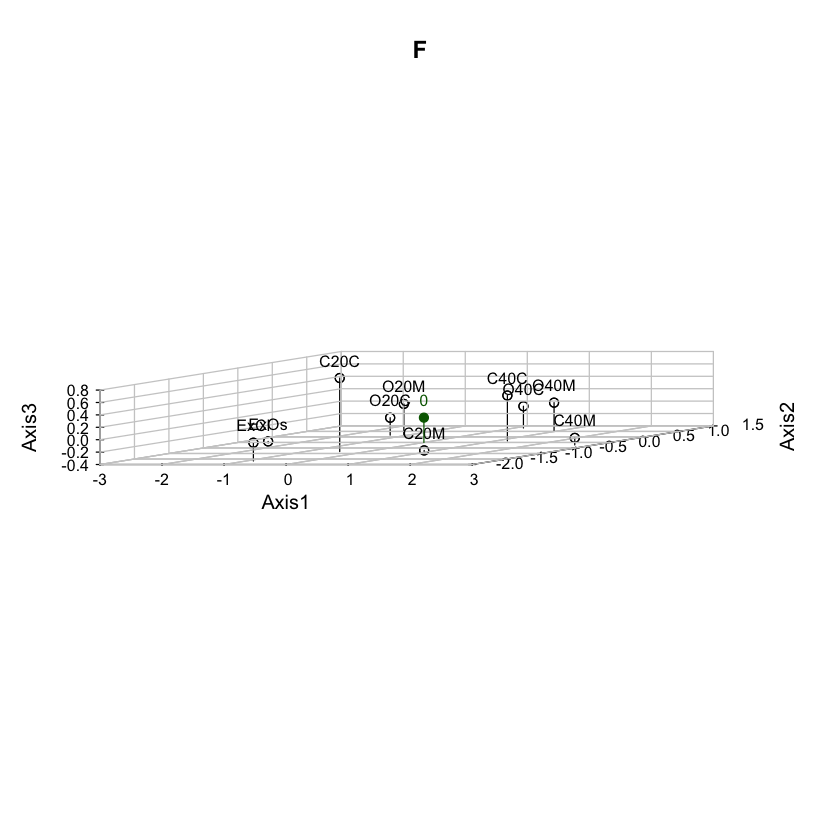

In [23]:
par(las=1) # etiquetas de los dos ejes sean horizontales;
X3D<-scatterplot3d(F,main="F",type ="h",box=FALSE,asp=1); 
X3D$points3d(F,pch=1);
addgrids3d(F,grid=c("xy","xz","yz"),col.grid="grey80");
text (X3D$xyz.convert(F),labels=rownames(F),cex=0.8,pos=3);
X3D$points3d (t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(X3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,col="darkgreen"
	 ,cex=0.8);

#### Mejor plano de proyección

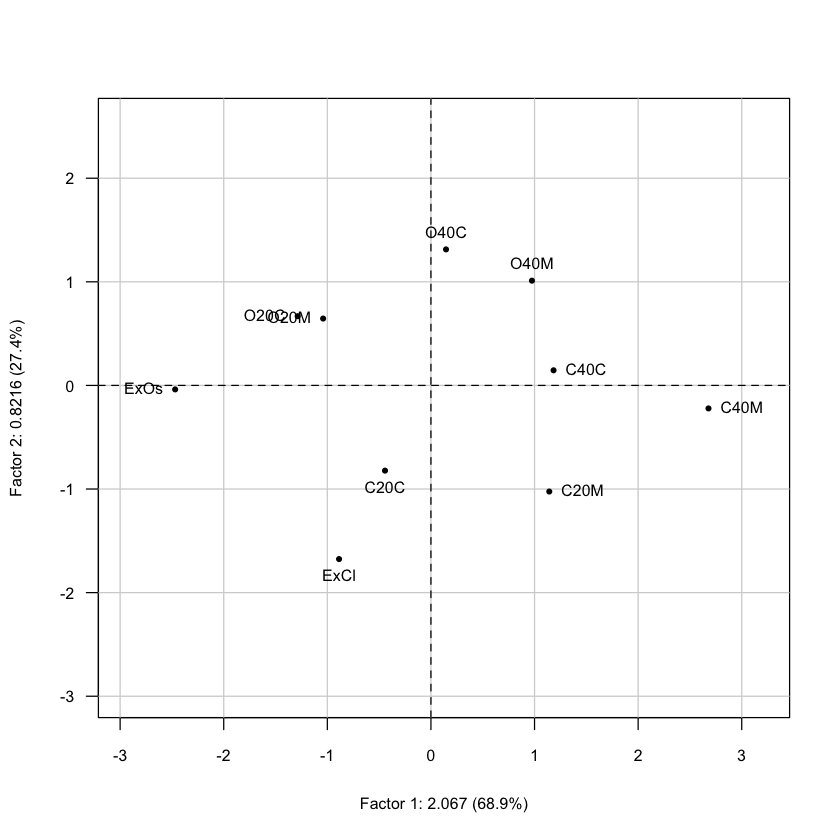

In [24]:
plot(acp,Tcol=FALSE,asp=1)

## Representación de las variables

Las tres columnas de **X** representan los valores de cada una de las tres variables estandarizadas y se representan con tres flechas en $\Re^10$. Cada flecha tiene longitud uno, por lo tanto las variables están en un cascarón esférico de radio 1. La mejor proyección en $\Re^2$ de  esta representación se puede ententer como dividir la esfera en dos con un plano que pase por el centro, de manera que las variables en conjunto se reduzcan lo menos posible al proyectarlas en el plano. Por lo tanto la proyección tiene la forma de un círculo que se llama círculo de correlaciones.

#### Círculo de correlaciones

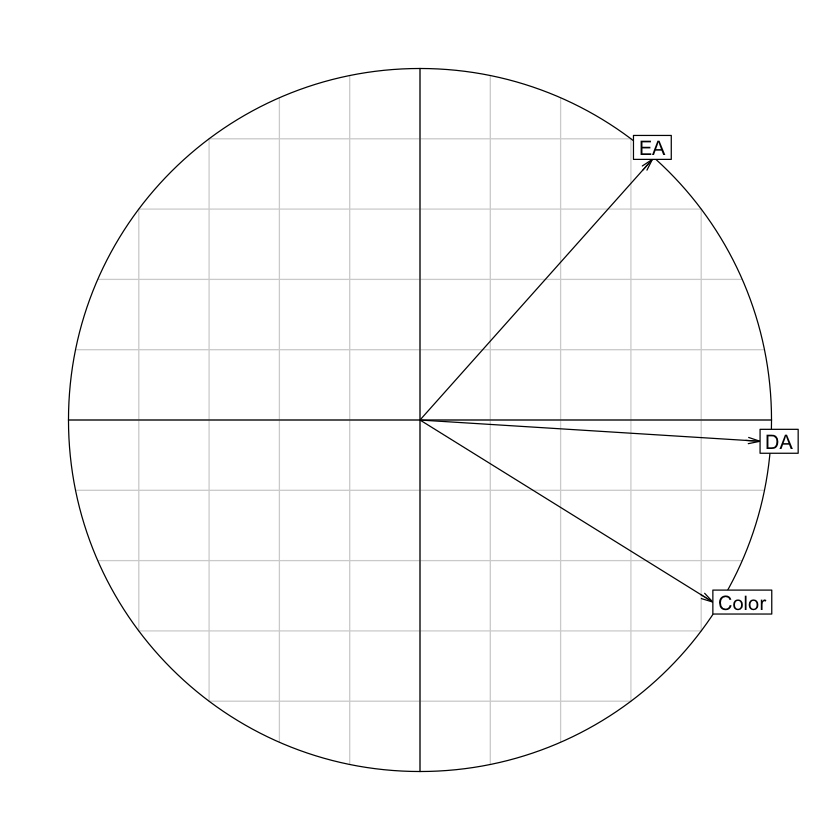

In [25]:
s.corcircle(acp$co)

## <span style="color:blue"><center>Geometría de *p* variables y *n* individuos</center></span>


<figure> 
<img src="../imagenes/esquemaTabla.png"  width="240" height="240" align="left"/> 
</figure>

## <span style="color:blue"><center>Ejemplo de *p=5* variables y *n=445* individuos</center></span>

Resultados de los 5 componentes de los admitidos a las 7 carreras de la Facultad de Ciencias para el primer semestre de 2013. 

#### Extracto de la tabla


In [26]:
data(admi)
Y=admi[,2:6]
Y[seq(1,445,50),]
# Matriz de varianzas y covarianzas
V=var(Y)*444/445
round(V,3)

,mate,cien,soci,text,imag
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.03,10.84,12.08,10.62,10.68
51,10.64,13.17,10.38,11.92,9.89
101,14.07,11.16,11.03,12.87,10.41
151,10.34,12.12,10.70,11.21,12.54
201,9.68,10.16,11.03,10.62,10.68
251,11.48,12.12,11.03,11.54,10.96
301,10.34,10.16,10.05,10.35,10.41
351,14.07,13.17,10.05,11.21,12.54
401,10.03,10.51,12.08,11.21,11.26


,mate,cien,soci,text,imag
mate,1.281,0.386,0.237,0.271,0.239
cien,0.386,0.997,0.138,0.200,0.123
soci,0.237,0.138,0.746,0.318,0.091
text,0.271,0.200,0.318,0.980,0.046
imag,0.239,0.123,0.091,0.046,1.004


ACP sin estandarizar, ya que los resultados están expresados con media 10 y desviación estandar 1, con todos los resultados (admitidos y no admitidos para todas las carreras). 

In [27]:
library(factoextra) # para gráficas con ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Inertia information:
Call: inertia.dudi(x = acpadmi)

Decomposition of total inertia:
    inertia     cum  cum(%)
Ax1  1.9238   1.924   38.41
Ax2  0.9941   2.918   58.26
Ax3  0.8510   3.769   75.25
Ax4  0.7219   4.491   89.67
Ax5  0.5176   5.009  100.00

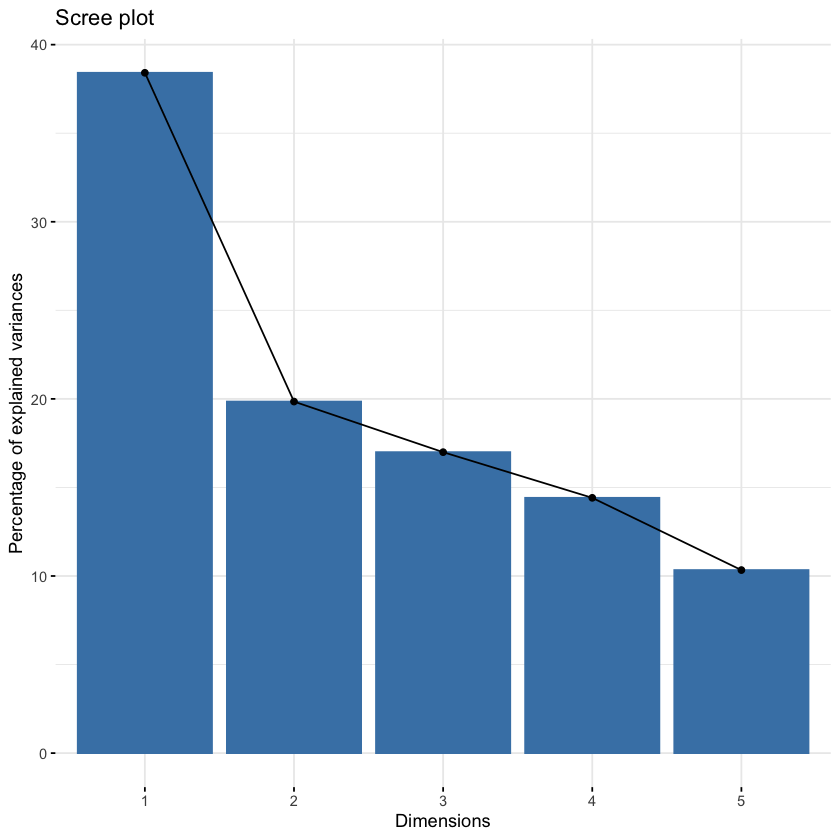

In [28]:
acpadmi=dudi.pca(Y,scale=FALSE,scannf=FALSE)
# histograma de valores propios
fviz_eig(acpadmi)
inertia(acpadmi)

In [29]:
"promedio de valores propios"
round(sum(acpadmi$eig)/5,4)

[1] "promedio de valores propios"

[1] 1.0017

**Dos ejes son suficientes para una síntesis de los resultados**
 1. La varianza del primer eje es casi el doble de la del segundo, en el gráfico se descata de los demás, su varianza corresponde al 38.4 de la inercia
 2. El segundo eje alcanza casi el valor del promedio.
 3. El primer plano factorial (ejes 1 y 2) retiene un 58.3% de la inercia total (5.009).

#### Primer plano factorial de las variables

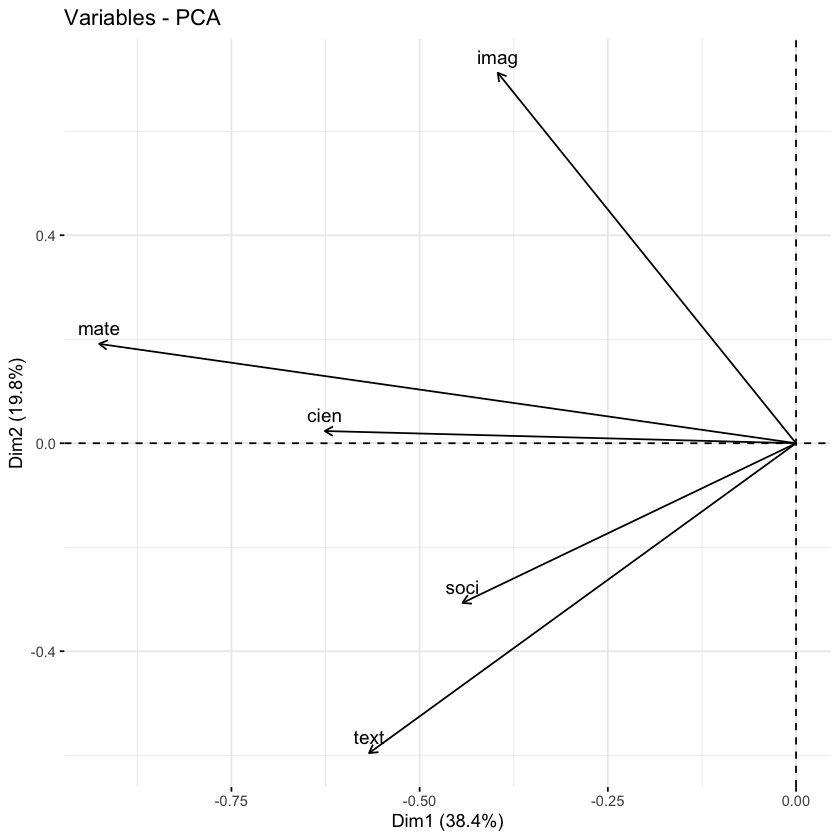

In [30]:
fviz_pca_var(acpadmi)

El primer eje es un factor tamaño: el lado negativo del primer eje significa mayores resultados en todos los componentes, sobretodo en matemáticas. Los coeficientes del primer eje son:

In [31]:
rownames(acpadmi$c1)
round(acpadmi$c1[,1],3)

[1] "mate" "cien" "soci" "text" "imag"

[1] -0.667 -0.451 -0.319 -0.409 -0.286

El lado positivo del segundo eje indica sobretodo mejores resultados en imagen y el negativo en textual, seguido de sociales. Los coeficientes son:

In [32]:
rownames(acpadmi$c1)
round(acpadmi$c1[,2],3)

[1] "mate" "cien" "soci" "text" "imag"

[1]  0.192  0.024 -0.308 -0.598  0.715

#### Primer plano factorial de los admitidos

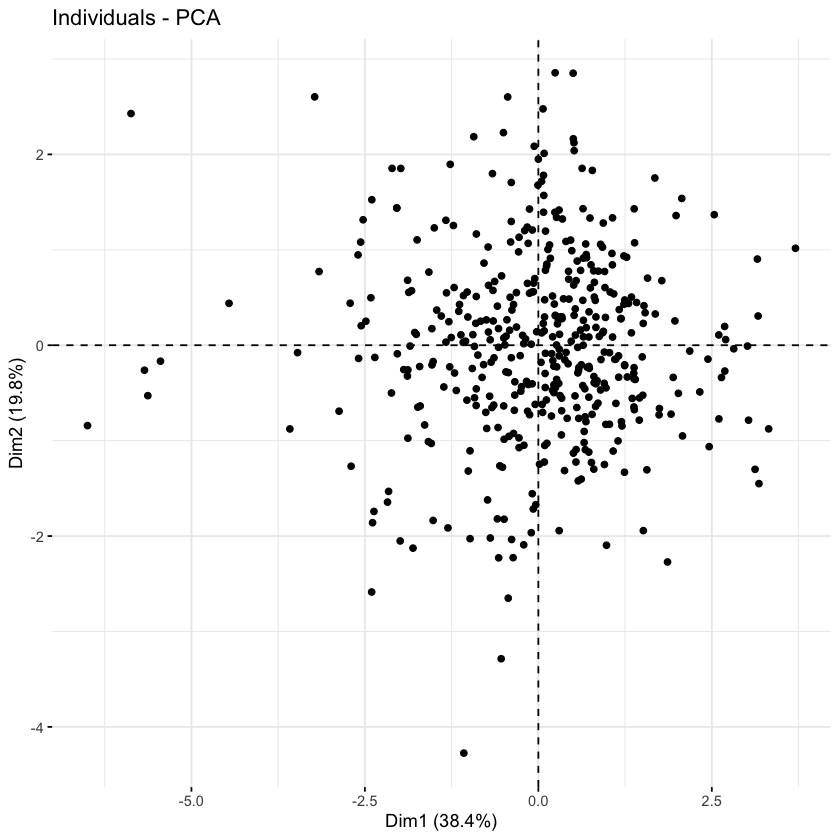

In [33]:
fviz_pca_ind(acpadmi,label="NONE")

#### La carrera como variable cualitativa suplementaria

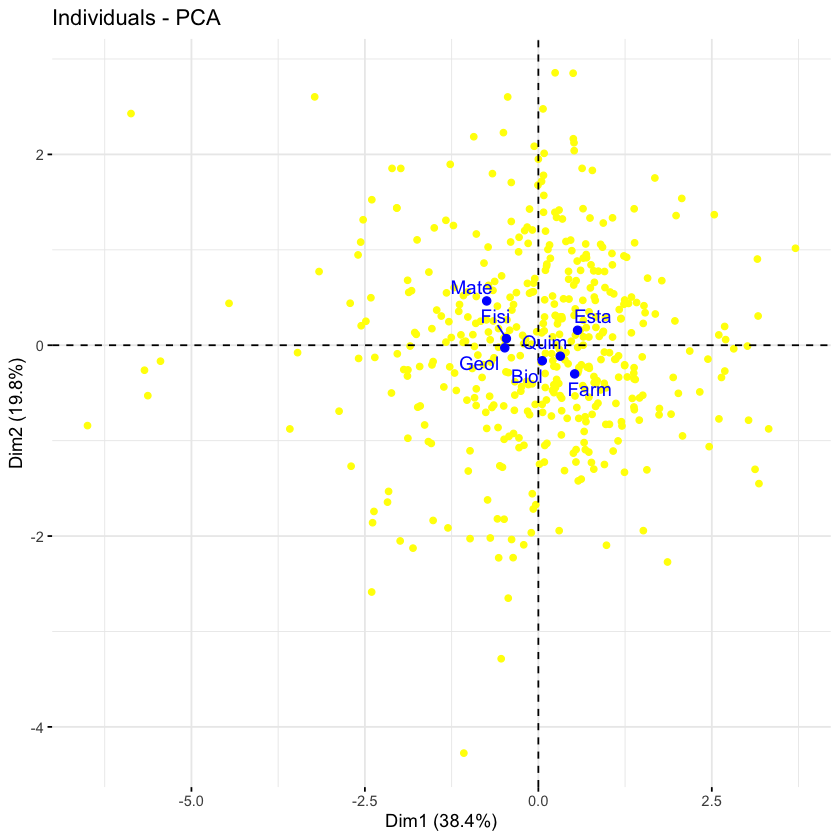

In [34]:
carrsup=supqual(acpadmi,as.data.frame(admi$carr))
#plano12
plano12=fviz_pca_ind(acpadmi,col.ind="yellow",label="NONE")
fviz_add(plano12,carrsup$coor,repel=TRUE)

Los promedios de las carreras quedan ordenadas de mayor (-) a menor(+) en el primer eje: Matemáticas, Física, Geología, Biología, Química, Farmacia y Estadística. En el segundo eje se oponen Matemáticas (+) y Farmacia (-), lo que indica mejor rendimiento promedio en imagen para los admitidos a Matemáticas y mayor en Textual para Farmacia.

In [35]:
# =========================

## <span style="color:blue"><center>Análisis en componentes principales (ACP)</center></span>

Abordaremos el caso general del ACP canónico utilizando el ejemplo café en $\Re^3$ pero pensando en el caso general de $n$ filas ("individuos") y $p$ columnas (variables).

### Ejemplo Café y notación

Utilizaremos como ejemplo para entender la geometría en $\Re^3$ e introducir la notación usada para el **análisis en componentes principales (ACP)**, la tabla de los 10 cafés por las tres variables físicas.

La matriz de datos la denotamos por **Y**

### Tratamientos

Los nombres de las filas informan de las condiciones de cada tratamiento.

In [36]:
# una opción de construir la tabla del los tratameintos con R
tratamientos=data.frame(tostacion=gl(2,6,labels=c("clara","oscura")),
                        porcentaje=gl(2,3,12,labels=c("40","20")),
                        grano=gl(3,1,12,labels=c("excelso","maiz","cebada")))
tratamientos=tratamientos[-c(4,10),]        
rownames(tratamientos)=rownames(cafe)[1:10]
tratamientos$porcentaje[c(1,6)]=NA
tratamientos


,tostacion,porcentaje,grano
,<fct>,<fct>,<fct>
ExCl,clara,NA,excelso
C40M,clara,40,maiz
C40C,clara,40,cebada
C20M,clara,20,maiz
C20C,clara,20,cebada
ExOs,oscura,NA,excelso
O40M,oscura,40,maiz
O40C,oscura,40,cebada
O20M,oscura,20,maiz


In [37]:
# definición de Y
Y<-cafe[1:10,1:3]
t(Y)

,ExCl,C40M,C40C,C20M,C20C,ExOs,O40M,O40C,O20M,O20C
Color,298.0,361.0,321.0,335.0,314.0,186.0,278.0,238,226.0,210.0
DA,385.1,481.3,422.6,444.3,368.7,346.6,422.6,403,368.7,368.7
EA,25.0,41.0,40.0,33.0,32.0,28.0,43.0,42,36.0,35.0


La tabla de datos tiene $n$ filas, las unidades estadísticas del análisis que denominaremos individuos y $p$ columnas que sonvariables continuas. La tabla la notamos **Y** y sus dimensiones son $n \times p$

Un individuos $i$ esta representado por la fila $\mathbf{y}_i^T$ de **Y** y es un vector fila de $p$ componentes. La representación geométrica la denominamos **nube de individuos**: $n$ puntos en $\Re^p$. Los ejes son las variables y los individuos puntos que se ubican en $\Re^p$ de acuerdo con los valores que tienen para cada uno de ellas. Las distancias entre puntos quedan también representadas.

Una columna $j$ (variable continua) en un vector columna $\mathbf{Y}_j$, que tiene los valores de las variable para los $n$ individuos, entonces la **nube de variables** está conformada por $p$ vectores variables en $\Re^n$. Los ejes son los individuos y en este espacio los resúmenes estadísticos de las variables adquieren significado geométrico.

Por comodidad abordaremos primero la nube de individuos y después la de variables y luego  la relación entre los dos espacios ya que éstos son duales.

### Nube de individuos

- Coordenadas de un individuo $i$: $\{y_{ij}, \ j=1,2,\cdots,p\}$. Por ejemplo el café de la primera fila tiene coordenadas:

In [38]:
Y[1,]

,Color,DA,EA
,<int>,<dbl>,<int>
ExCl,298,385.1,25


- Peso: $p_i$, $\sum\limits_{i=1}^n p_i = 1$ en caso de pesos iguales $p_i = \dfrac{1}{n} \ \ \ \forall i$. El peso es el mismo para éste y los otros 9 cafés:

In [39]:
1/10

[1] 0.1

- Centro de gravedad de la nube de puntos:
$$
\mathbf{g}= \sum_{i=1}^{n} p_i  \mathbf{y}_i  = \frac{1}{n} \sum_{i=1}^{n} \mathbf{y}_i
$$

In [40]:
g = colMeans(Y)
g

Color     DA     EA 
276.70 401.16  35.50

#### Representación de la nube en $3D$, junto con su centro de gravedad.

,Color,DA,EA
,<dbl>,<dbl>,<dbl>
C40M,361.0,481.30,41.0
ExOs,186.0,346.60,28.0
O20C,210.0,368.70,35.0
O20M,226.0,368.70,36.0
g,276.7,401.16,35.5


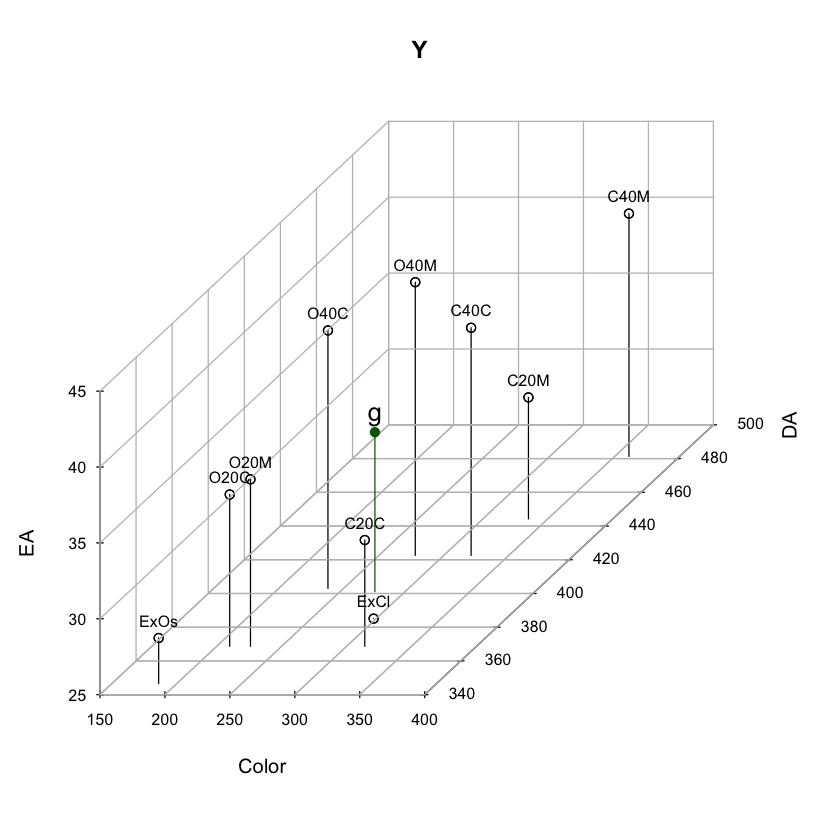

In [41]:
par(las=1); # grafica;
Y3D<-scatterplot3d(Y,main="Y",type="h",color="black",box=FALSE,las=1); 
Y3D$points3d(Y,pch=1);
addgrids3d(Y, grid = c("xy","xz","yz"));
cord2d<-Y3D$xyz.convert(Y) # convertir cordenadas 3D a 2D;
# poner etiquetas;
text(cord2d,labels=rownames(Y), cex=0.8,col="black",pos=3); 
# poner el centro de gravedad en la gráfica
Y3D$points3d(t(g),pch=19,col="darkgreen",type = "h");
text(Y3D$xyz.convert(t(g)),labels="g",pos=3,col="black",
     cex=1.3);
rbind(Y[c("C40M","ExOs","O20C","O20M"),],g=g)-> sel
sel

#### Gráfica 3D para rotar. No ejecute aquí el siguiente código
Copie y pegé el código siguiente en la consola de R, use el ratón para girar la gráfica.

## Transformaciones de la tabla de datos

#### **Centrado de la nube de puntos**
Los ejes se trasladan al centro de gravedad, restando a cada vector individuo el centro de gravedad:
$$
\mathbf{y_C}_i = \mathbf{y}_i - \mathbf{g}
$$

Proyección 

,Color,DA,EA
ExCl,21.3,-16.06,-10.5
C40M,84.3,80.14,5.5
C40C,44.3,21.44,4.5
C20M,58.3,43.14,-2.5
C20C,37.3,-32.46,-3.5
ExOs,-90.7,-54.56,-7.5
O40M,1.3,21.44,7.5
O40C,-38.7,1.84,6.5
O20M,-50.7,-32.46,0.5
O20C,-66.7,-32.46,-0.5


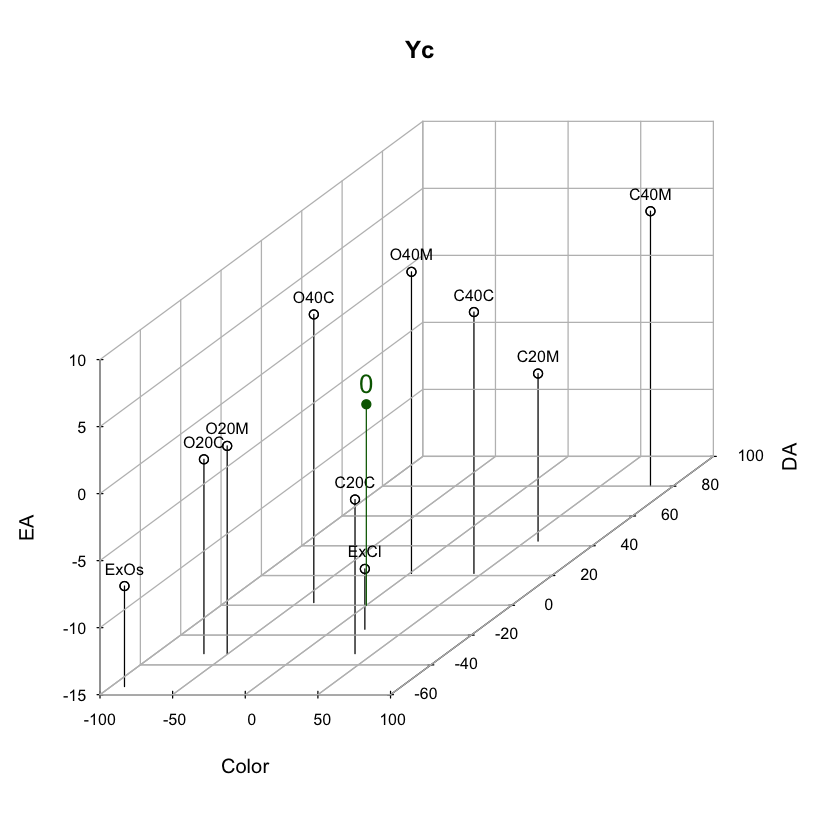

In [42]:
# cálculo de la matriz de datos centrados y representación en 3D
Yc<-scale(Y,scale=FALSE)   #calculo
Yc
attr(Yc,"scaled:center")->g  #la función scale muestra el centro de gravedad
# grafica de datos centrados
par(las=1);
Yc3D<-scatterplot3d(Yc,main="Yc",type="h",color="black",
	               box=FALSE,las=1);
Yc3D$points3d(Yc,pch=1);
addgrids3d(Yc,grid=c("xy", "xz", "yz"));
text (Yc3D$xyz.convert(Yc),labels=rownames(Yc),cex=0.8,
	  col="black",pos=3);
Yc3D$points3d(t(c(0 ,0 ,0)),pch=19 , col ="darkgreen",type = "h");
text(Yc3D$xyz.convert (t(c(0 ,0 ,0))),labels ="0",pos =3, 
     col ="darkgreen",cex =1.3);


In [43]:
#=======================================
# Ejecute este código en la consola de R
#==============================
Yc<-scale(Y,scale=FALSE)   #calculo
plot3d(Yc)
grid3d(c("x", "y+", "z"))
text3d(Yc, texts=row.names(Yc))
text3d(c(0,0,0),texts="0",col="red")
#========================================

ERROR: Error in plot3d(Yc): could not find function "plot3d"


#### **Inercia de la nube de puntos**
La varianza de una variable es también el momento de inercia de $n$ puntos en equilibrio sobre una barra que se apoya en el centro de gravedad. Para $p$ variables es la misma situación de equilibro pero en un hiperplano $\Re^p$. De esa analogía se toma el termino **inercia** para resumir en un número la dispersión de la nube de puntos, y se define como:
$$
Inercia(N_n) = \sum\limits_{i=1}^{n}{p_i
d^2(i,\mathbf{g})}
$$
$$
  Inercia(N_n) =
 \sum\limits_{i=1}^{n} p_i\sum\limits_{j=1}^{p}y_{{_C}_{ij}}^2 =
  \sum\limits_{j=1}^{p}\sum\limits_{i=1}^{n} p_i y_{{_C}_{ij}}^2
 = \sum\limits_{j=1}^{p}\sigma_j^2 
$$
Obsérvese que la inercia es la suma de las varianzas de las $p$ variables.

#### **Matriz de varianzas y covarianzas**
Si los pesos de los individuos son iguales: $p_i=\frac{1}{n}$
$$
  \mathbf{V}=\dfrac{1}{n} \mathbf{Y'_C}\mathbf{Y_C} $$ 
La inercia de la nube de puntos es también: $Inercia(N_n) = traza(\mathbf{V})$



In [ ]:
V<-covfacwt(Y) # función de ade4 para calcular V dividiendo por n
round(V,0)

#### **Cálculo y gráfica 3D de la matriz de datos estandarizados X**

In [ ]:
# Cálculo de matriz X estandarizada
X<-scalewt(Y) # de ade4 calcula la desviación estándar dividiendo por n
round(X,2)
# aquí la función scale calcula la media y la desviación estándar
# las varianzas que calcula R es la muestral: se divide por n-1
round(data.frame(media=attributes(X)$`scaled:center`,desv=attributes(X)$`scaled:scale`),1)
#round(cbind(attr(X,"scaled:center"),attr(X,"scaled:scale")),1)
# gráfica de la matriz centrada y reducida (estandrizada)
par(las=1) # etiquetas de los dos ejes sean horizontales;
X3D<-scatterplot3d(X,main="X",type ="h",box=FALSE); 
X3D$points3d(X,pch=1);
addgrids3d(X,grid=c("xy","xz","yz"),col.grid="grey80");
text (X3D$xyz.convert(X),labels=rownames(X),cex=0.8,pos=3);
X3D$points3d (t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(X3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,col="darkgreen",cex=0.8);


#### Gragica rotable. No correr aquí solo en consola

In [ ]:
#=======================================
# Ejecute este código en la consola de R
#==============================
X<-scalewt(Y)  
plot3d(X)
grid3d(c("x", "y+", "z"))
text3d(X, texts=row.names(X))
text3d(c(0,0,0),texts="0",col="red")
#========================================

## **Búsqueda del eje de mayor inercia proyectada (varianza)**

El valor de la proyección de un individuo *i* sobre el eje generado por un vector $\mathbf{u}$ unitario es: $<\mathbf{x}_i,\mathbf{u}>=\mathbf{x}_i'\mathbf{u}$.

El individuo $i$ suma a la inercia proyectada (varianza) sobre el eje $\mathbf{u}$ la cantidad $\dfrac{1}{n} (\mathbf{x}_i'\mathbf{u})^2$.

La inercia total de la nube de individuos (varianza), proyectada sobre el eje $\mathbf{u}$ es entonces:
$$
\sum_{i=1}^{n} \frac{1}{n} (\mathbf{x}_i'\mathbf{u})^2 =
\frac{1}{n}(\mathbf{Xu})'\mathbf{Xu} = \mathbf{u'}\frac{1}{n}\mathbf{X'Xu}
$$



<center>
<img src="https://github.com/cepardot/DiplomadoIAyAP20211/blob/main/uProyeccion.png?raw=TRUE" alt="Proyección sobre u" width="300" height="400">
<center>

<center>
<img src="https://images3.programmerclick.com/611/1d/1da21c4ce8bb7e0d68f27776d42a0c13.gif" alt="Linea proyeccion" width="400" height="500">
<center>

Geométricamente la búsqueda del eje equivale a rotarlo hasta que la suma de cuadrados de las proyecciones de los puntos sobre él  sea máxima. Cuando los puntos tienen pesos iguales el eje coincide con la dirección donde la nube de puntos esté más alargada. Se puede observar que cualquier vector que esté sobre la recta es solución y por lo tanto se introduce la condición de que el vector sea unitario: $\mathbf{u'u}=1$, con lo cual las soluciones son dos, ya que si $\mathbf{u}$ es solución $-\mathbf{u}$ también lo es. Cómo es una optimización se pueden tener diferentes procedimientos para hacerlo. En Álgebra lineal se obtiene una solución analítica utilizando la técnica de multiplicadores de Lagrange.

La solución es uno de los dos vectores propios unitarios asociados al valor propio más grande de la matriz:
$$
\dfrac{1}{n}\mathbf{X'X}
$$
que es la matriz de correlaciones. Una pareja (valor propio más grande, vector propio) se denota 
$(\lambda_1 ,\mathbf{u}_1)$

La matriz de correlaciones, cuando $n\geq p$, generalmente tiene $p$ valores propios, los cuales se ordenan de mayor a menor:
$$
\lambda_1 \geq \lambda_2 \geq \cdots \lambda_s \geq \cdots \lambda_S \geq \cdots \lambda_p
$$

Los
$p$ vectores propios
 $\{\mathbf{u_1},\cdots,\mathbf{u_s},\cdots,\mathbf{u_S} \cdots,\mathbf{u_p} \}$
generan un sistema de nuevos ejes, denominados componentes principales, que son variables, calculadas como combinaciones lineales (sumas ponderadas de las $p$ variables originales), se notan como $F_s, s=1,2 \cdots p$, que se pueden entender como nuevas variables y como vectores de dimensión $n \times 1$, cada uno con los valores de la nueva variable. Los  $p$ vectores $\mathbf{u}_s$ conforman una nueva base para soportar la nube de puntos.

<center>
<img src="https://miro.medium.com/max/972/1*foB2cfjPCgHVnSyon293pQ.gif" alt="eigenvectores" width="250" height="350">
<center>

Geométricamente lo que se ha hecho es una rotación rígida de los ejes. Veamos lo que sucede con el ejemplo café.

#### *Con la función eigen{base}*

In [ ]:
V<-cor(Y)

#### *Todos los resultados con la función dudi.pca{ade4} en el objeto acpcafe* 


In [47]:
acpcafe<-dudi.pca(X,scannf=FALSE,nf=3)
acpcafe #contenido del objeto café

Duality diagramm
class: pca dudi
$call: dudi.pca(df = X, scannf = FALSE, nf = 3)

$nf: 3 axis-components saved
$rank: 3
eigen values: 2.067 0.8216 0.1113
  vector length mode    content       
1 $cw    3      numeric column weights
2 $lw    10     numeric row weights   
3 $eig   3      numeric eigen values  

  data.frame nrow ncol content             
1 $tab       10   3    modified array      
2 $li        10   3    row coordinates     
3 $l1        10   3    row normed scores   
4 $co        3    3    column coordinates  
5 $c1        3    3    column normed scores
other elements: cent norm 

#### *Valores propios*

In [48]:
round(acpcafe$eig,3)

[1] 2.067 0.822 0.111

*Vectores propios*

In [49]:
round(acpcafe$c1,3)

,CS1,CS2,CS3
,<dbl>,<dbl>,<dbl>
Color,0.579,-0.571,0.581
DA,0.673,-0.067,-0.737
EA,0.460,0.818,0.346


Note que el primer vector propio (columna CS1) tiene todas las coordenadas positivas y el primer vector propio obtenido con la función *eigen* de R tiene las tres coordenadas negativas ¿A qué se debe esto?

___________________________________________________________________________________________________________________

*Coordenadas de los individuos sobre los nuevos ejes*

In [50]:
F<-acpcafe$li
round(F,2)

,Axis1,Axis2,Axis3
,<dbl>,<dbl>,<dbl>
ExCl,-0.89,-1.68,-0.11
C40M,2.68,-0.22,-0.29
C40C,1.18,0.15,0.33
C20M,1.14,-1.02,-0.35
C20C,-0.44,-0.82,0.79
ExOs,-2.47,-0.04,-0.38
O40M,0.98,1.01,0.06
O40C,0.15,1.31,-0.05
O20M,-1.04,0.65,0.11


*Grafica 3D de los cafés*

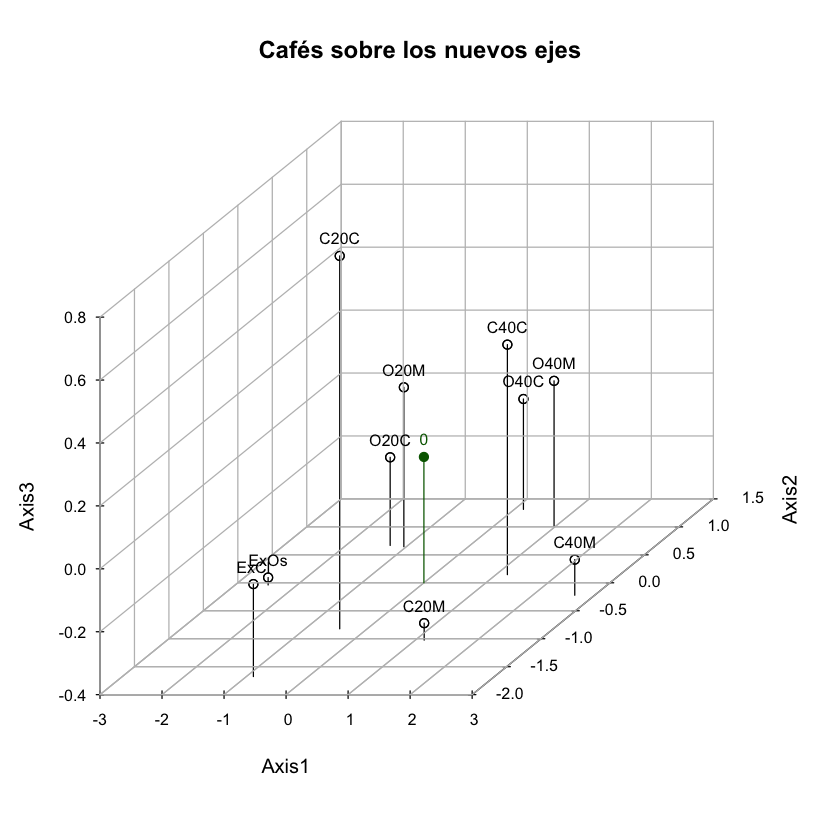

In [51]:
# gráfica de la matriz centrada y reducida (estandrizada)
par(las=1) # etiquetas de los dos ejes sean horizontales;
X3D<-scatterplot3d(F,main="Cafés sobre los nuevos ejes",type ="h",box=FALSE); 
X3D$points3d(F,pch=1);
addgrids3d(F,grid=c("xy","xz","yz"));
text(X3D$xyz.convert(F),labels=rownames(F),cex=0.8,pos=3);
X3D$points3d (t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(X3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,col="darkgreen"
	 ,cex=0.8);


#### Proyección de los cafés sobre el primer plano factorial

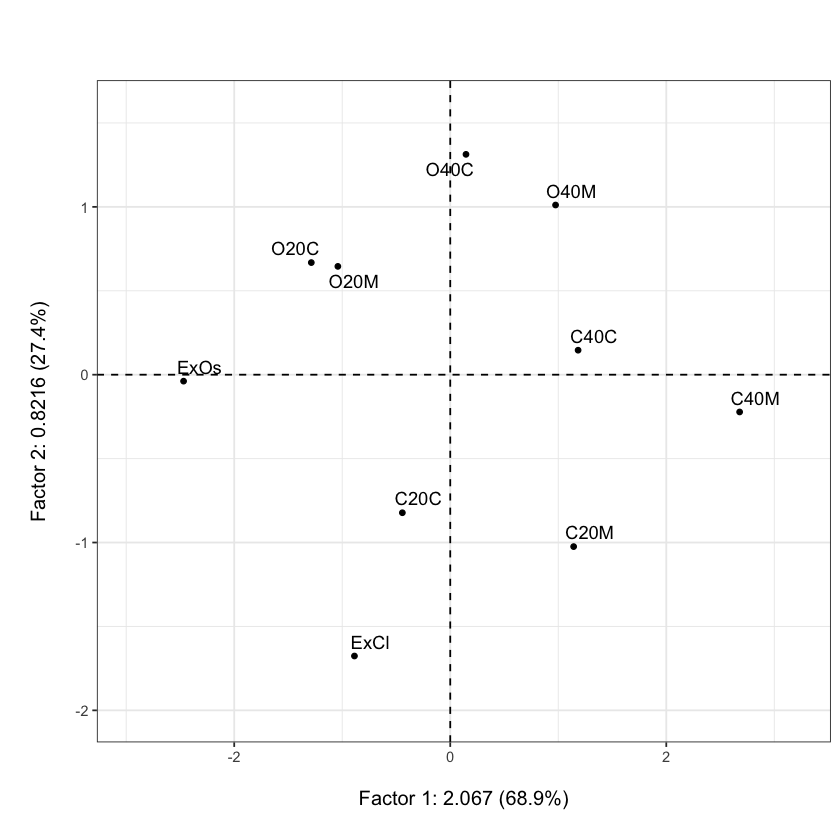

In [52]:

plot(acpcafe,Tcol=FALSE,gg=TRUE)  # plot.dudi{FactoClass}
## con gg=TRUE, la función usa ggplot2 y ggrepel 
## para que las etiquetas no queden superpuestas


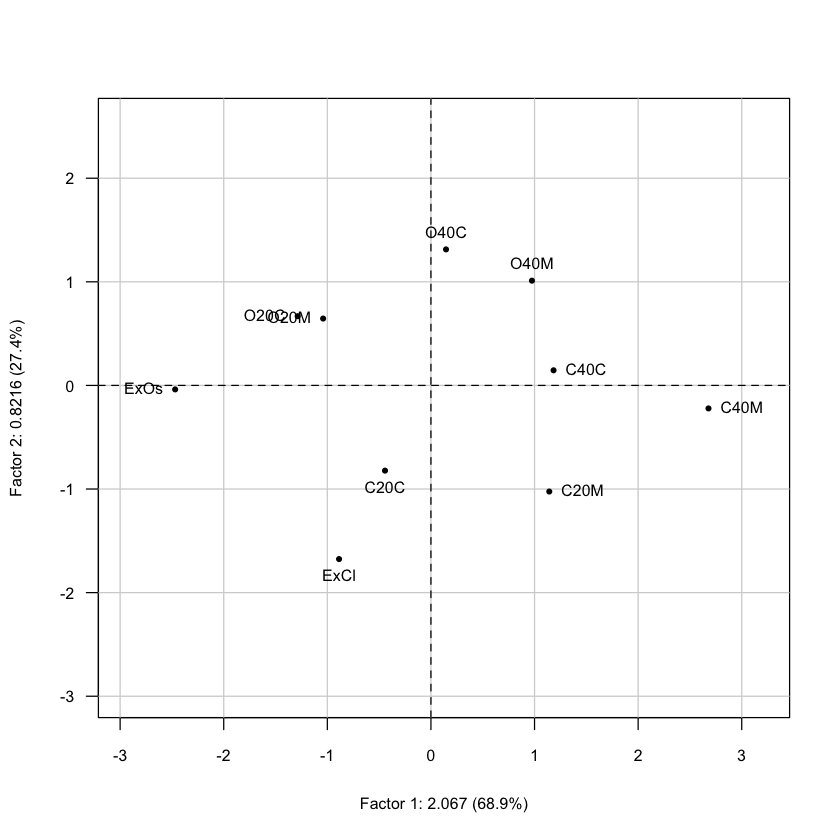

In [53]:
# para que los ejes queden con la misma escala
plot(acpcafe,Tcol=FALSE,asp=1)

Histograma de valores propios

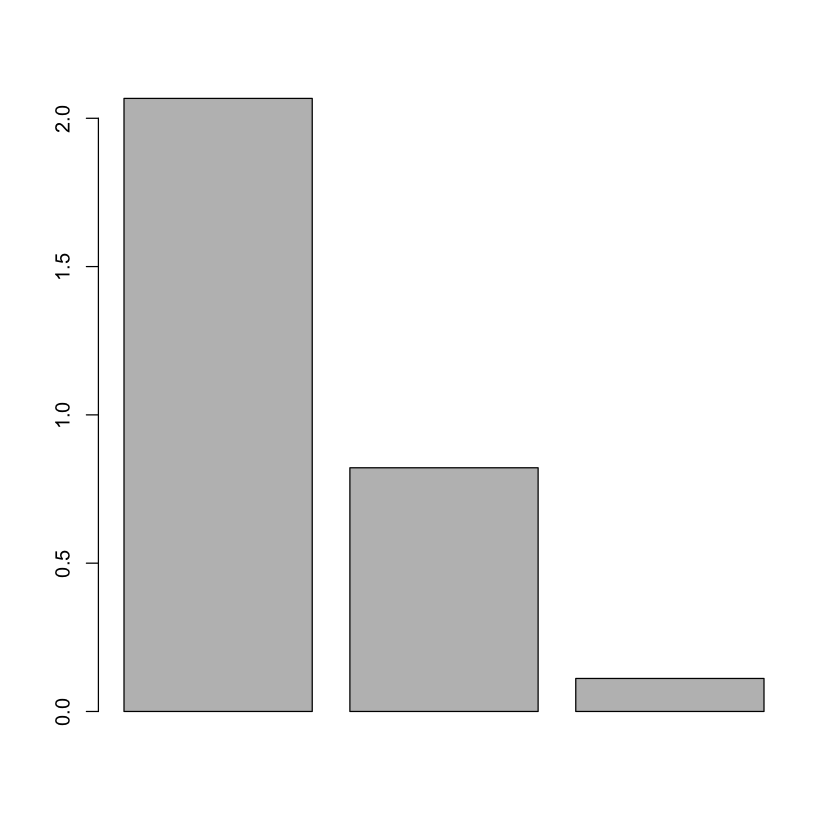

In [54]:
barplot(acpcafe$eig)

### Nube de variables

La matriz de datos $\mathbf{Y}$ y sus transformaciones tienen una interpretación dual a la de los individuos: la nube de variables. Ahora los ejes son los individuos y las variables son los puntos. En el ejemplo café, se tienen entonces, tres puntos variable en $\mathbf{R}^{10}$.


In [44]:
Y

,Color,DA,EA
,<int>,<dbl>,<int>
ExCl,298,385.1,25
C40M,361,481.3,41
C40C,321,422.6,40
C20M,335,444.3,33
C20C,314,368.7,32
ExOs,186,346.6,28
O40M,278,422.6,43
O40C,238,403.0,42
O20M,226,368.7,36


En el espacio de las variables los pesos están en la diagonal de $\mathbf{I}_p$, es decir son uno para todas las variables, y la métrica (matriz que define el producto interno) es la matriz diagonal con los pesos de los individuos, es decir $\frac{1}{n}\mathbf{I}_n$, para el caso de pesos iguales. Con esta métrica las estadísticas de resumen y las transformaciones de la matriz desde $\mathbf{Y}$ hasta la $\mathbf{X}$ tienen significado geométrico, lo que resumo a continuación (ver el capítulo 3 del [libro Estadística descriptiva multivariada](https://bit.ly/3mD9rEY)). 

- Media de una variable $j$: 
$$
\bar{Y}_j = \frac{1}{n} \sum_{i=1}^{n} y_{ij} = 
\frac{1}{n}\mathbf{Y'}_j \mathbf{1_{_n}} =
\left<  \mathbf{Y}_j,\mathbf{1_{_n}} \right>_{\frac{1}{n}\mathbf{I}_n} 
$$

- Centrado de una variable
$$
\mathbf{Y}_{C_j}=\mathbf{Y}_j - \overline{Y} \mathbf{1}_n 
$$
donde $\mathbf{1}_n$ es un vetor de $n$ unos ($n \times 1$).

<center>
<img src="https://github.com/cepardot/DiplomadoIAyAP20211/blob/main/EDMvariables.png?raw=TRUE" alt="Significado de la media y el centrado de una variable" width="400" height="500">
<center>

- Varianza

$$
var(Y_j) = \frac{1}{n} \sum_{i=1}^n (y_{ij} - \bar{Y}_j)^2 = 
\left<\mathbf{Y_{C}}_j,\mathbf{Y_{C}}_j\right>_{\frac{1}{n}\mathbf{I}_n}
$$

- Covarianza

$$
 cov(Y_j,Y_{k}) = \frac{1}{n} \sum_{i=1}^n (y_{ij} - \bar{Y}_j)(y_{ik} - \bar{Y}_{k}) = 
\left<\mathbf{Y_{C}}_j,\mathbf{Y_{C}}_{k}\right>_{\frac{1}{n}\mathbf{I}_n}
$$

- Significado del reducido

$$
\mathbf{X_j}=
\dfrac{1}{\sigma_j}\mathbf{Y}_{C_j}
$$

    + Varianza de una variable centrada y reducida:
    
$$
<\mathbf{X_j,X_j}>_{\frac{1}{n}\mathbf{I_n}}=\mathbf{X_j^{'}}\left(\frac{1}{n}\mathbf{I}_n\right)\mathbf{X}_j=
\frac{1}{n}\mathbf{X_j^{'}X_j}=1
$$ 
    Las variables estandarizadas se pueden ver como flechas que terminan en el cascarón hiperesféricon de radio 1 y centro origen.
    
 - Correlación

$$
cor(Y_j,Y_{k}) = \frac{cov(Y_j,Y_{k})}{\sigma_j \sigma_{k}}=
\frac{ <\mathbf{Y_{C_j},Y_{C_k}}>_{\frac{1}{n}\mathbf{I_n}}}{\| \mathbf{Y_{C_j}} \|_{\frac{1}{n}\mathbf{I_n}} \|\mathbf{Y_{C_k}} \|_{\frac{1}{n}\mathbf{I_n}}}=
<\mathbf{X_j,X_{k}}>_{\frac{1}{n}\mathbf{I_n}}
$$

    + El espacio de las variables de un ACP normado es una representación de la matriz de correlaciones.
    
    + Si entre dos vectores variables hay un ángulo pequeño, su correlación es alta; mientras dos vectores variables ortogonales indican que las variables no están correlacionadas.



**Búsqueda de los nuevos ejes**

El procedimento para encontrar los nuevos ejes es el mismo que en el de los individuos.

<center>
<img src="https://github.com/cepardot/DiplomadoIAyAP20211/blob/main/EDMvariablesprimerEjeColor.png?raw=TRUE" alt="Búsqueda de los nuevos ejes en el espacio de las variables" width="300" height="400">
<center>

Solución con vectores propios $\frac{1}{n}\mathbf{I}_n$ unitarios asociados a los $\mu$ valores propios de la matriz:
$$
\frac{1}{n}\mathbf{XX'}
$$

- Esta matriz es $n \times n$, pero solo tiene $p$ valores propios mayores que 0 (se supone que $n \geq p$)

- Los dos espacios están relacionados.

### Relaciones entre los espacios de individuos y de variables

- La matriz  $$\frac{1}{n}\mathbf{XX'}$$ tiene $p$ valores propios, que son iguales a los valores propios de $$\frac{1}{n}\mathbf{X'X}$$ y los restantes $n - p$ valores propios son 0. 

- El vector coordenadas de los $n$ individuos sobre el eje $s$  $\mathbf{F}_s$, es un vector propio de $$\frac{1}{n}\mathbf{XX'}$$.

- La varianza de $\mathbf{F}_s$ es $\lambda_s$, y por lo tanto, el vector propio $\mathbf{v}_s$ se puede calcular mediante:  $$\mathbf{v}_s=\frac{1}{\sqrt{\lambda_s}}\mathbf{F}_s$$.

-  $\mathbf{G}_s$, vector de coordenadas de las $p$ variables sobre el eje $s$, es un vector propio de $$\frac{1}{n}\mathbf{X'X}$$.

- La varianza de $\mathbf{G}_s$ es $\lambda_s$, y por lo tanto, se puede obtener mediante:   $$\mathbf{G}_s =\sqrt{\lambda_s}\mathbf{u}_s$$.

- En el ACP normado, las coordenadas de $\mathbf{G}_s$ son las correlaciones entre las variables y el eje $s$: $cor(Y_j,F_s)$.


## **Círculo de correlaciones del ejemplo café**

,Color,DA,EA
Color,1.00,0.79,0.19
DA,0.79,1.00,0.57
EA,0.19,0.57,1.00


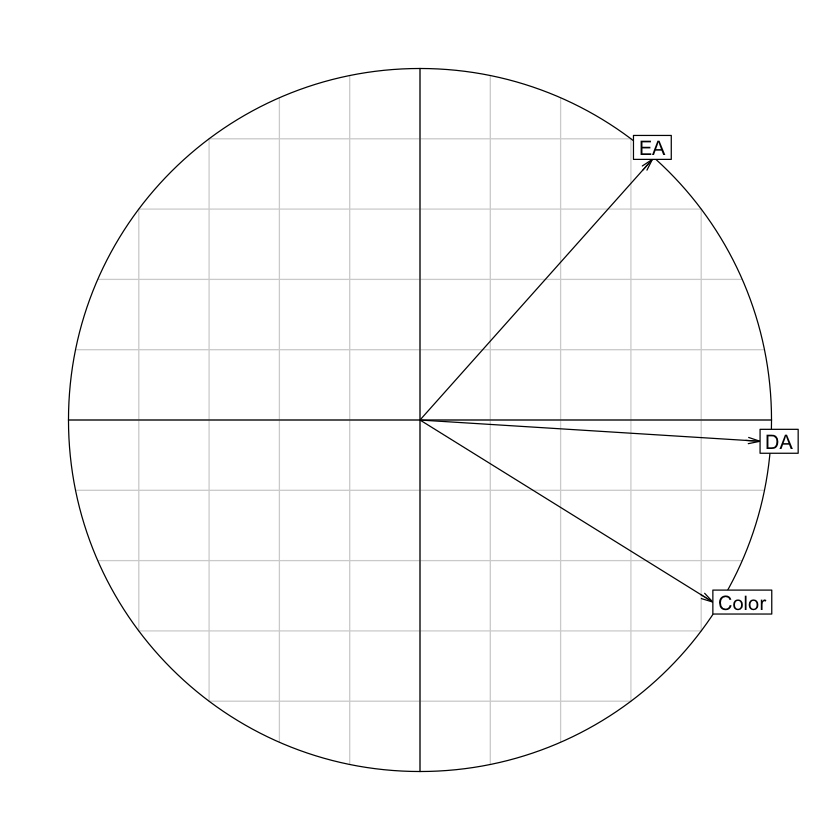

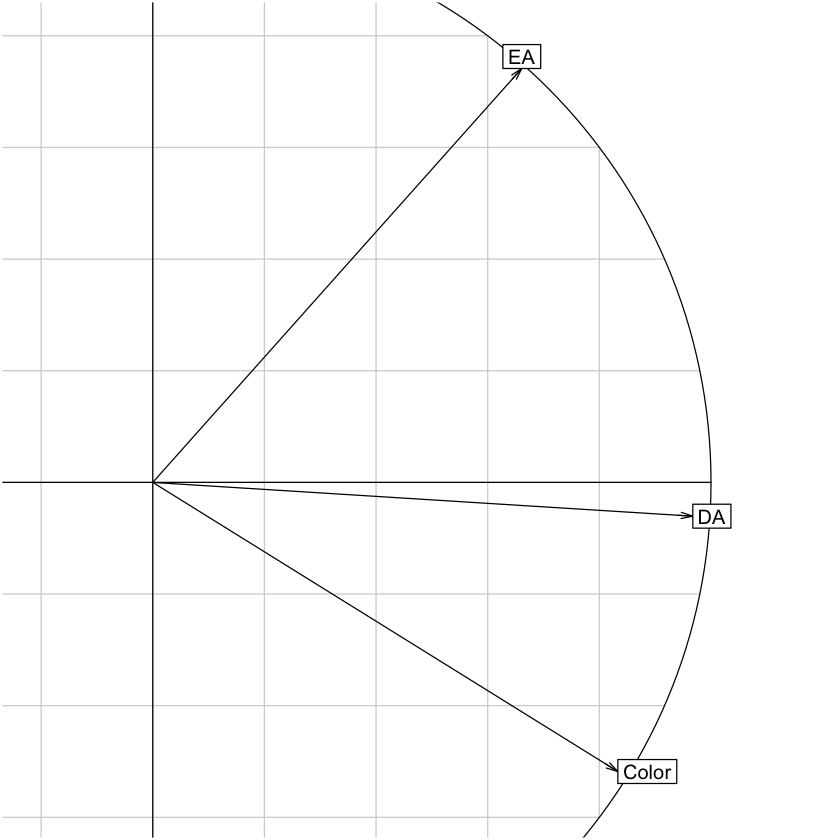

In [55]:
s.corcircle(acpcafe$co)
# matriz de correlaciones
round(cor(Y),2)
s.corcircle(acpcafe$co,fullcircle=FALSE)


In [56]:
as.dist(round(cor(Y),2))

   Color   DA
DA  0.79     
EA  0.19 0.57

# Ayudas para la interpretación
Es importante evitar malas lecturas de los ejes y planos factoriales. En las ayudas para la interpretación se encuentran índices para evitarlo. Otras ayudas orientan la lectura de las gráficas y la toma de decisiones metodológicas. A continuación se presentan las del ejemplo café y se recomienda leer sobre ellas en el capítulo 3 del libro EDM


In [58]:
ayuacpcafe<-inertia(acpcafe,T,T) # inertia.dudi es una función de ade4


#### Valores propios


,inertia,cum,cum(%)
,<dbl>,<dbl>,<dbl>
Ax1,2.07,2.07,68.90
Ax2,0.82,2.89,96.29
Ax3,0.11,3.00,100.00


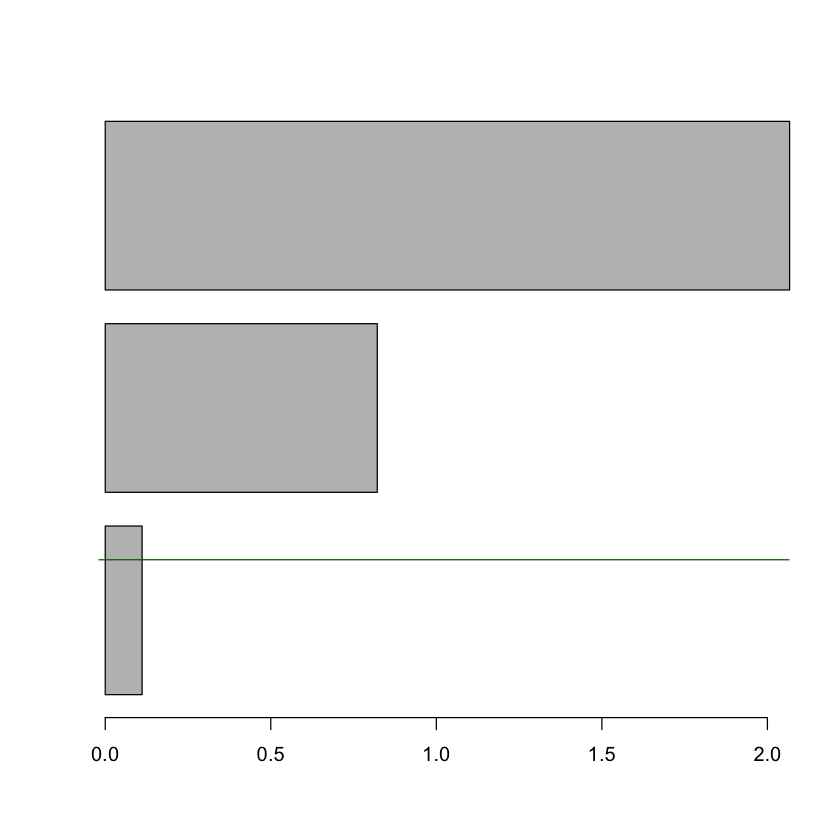

In [59]:
round(ayuacpcafe$tot.inertia,2)
barplot(ayuacpcafe$tot.inertia$inertia[3:1],hor=TRUE)
abline(h=1,col="darkgreen")

#### Coordenadas y ayudas para las variables

In [60]:
names(ayuacpcafe)

[1] "tot.inertia" "row.contrib" "row.abs"     "row.rel"     "row.cum"    
 [6] "col.contrib" "col.abs"     "col.rel"     "col.cum"     "nf"         
[11] "call"

In [61]:
attach(ayuacpcafe)
round(cbind(acpcafe$co,Ca=col.abs,Cos2=col.rel,conInercia=col.contrib),2)
detach(ayuacpcafe)

,Comp1,Comp2,Comp3,Ca.Axis1,Ca.Axis2,Ca.Axis3,Cos2.Axis1,Cos2.Axis2,Cos2.Axis3,conInercia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Color,0.83,-0.52,0.19,33.58,32.65,33.77,69.41,-26.83,3.76,33.33
DA,0.97,-0.06,-0.25,45.28,0.45,54.28,93.59,-0.37,-6.04,33.33
EA,0.66,0.74,0.12,21.14,66.90,11.96,43.70,54.97,1.33,33.33


#### Coordenadas y ayudas para los cafés

In [62]:
attach(ayuacpcafe)
round(cbind(acpcafe$li,Ca=row.abs,Cos2=row.rel,conInercia=row.contrib),2)
detach(ayuacpcafe)

,Axis1,Axis2,Axis3,Ca.Axis1,Ca.Axis2,Ca.Axis3,Cos2.Axis1,Cos2.Axis2,Cos2.Axis3,conInercia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ExCl,-0.89,-1.68,-0.11,3.80,34.19,1.01,-21.80,-77.89,-0.31,12.02
C40M,2.68,-0.22,-0.29,34.72,0.60,7.39,98.20,-0.67,-1.13,24.36
C40C,1.18,0.15,0.33,6.78,0.26,9.85,91.45,1.39,7.16,5.11
C20M,1.14,-1.02,-0.35,6.31,12.77,10.77,52.75,-42.41,-4.84,8.25
C20C,-0.44,-0.82,0.79,0.95,8.23,55.37,-13.20,-45.42,41.38,4.97
ExOs,-2.47,-0.04,-0.38,29.49,0.02,12.73,-97.70,-0.02,-2.27,20.79
O40M,0.98,1.01,0.06,4.60,12.44,0.35,48.09,51.72,0.19,6.59
O40C,0.15,1.31,-0.05,0.10,20.98,0.22,1.21,98.65,-0.14,5.82
O20M,-1.04,0.65,0.11,5.24,5.07,1.02,-71.67,27.58,0.75,5.03


# FIN